In [1]:
!pip install scikit-plot
!pip install imblearn

In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv('../Database/DB_v1.csv',index_col=False)
df=df.drop(['Unnamed: 0'],axis=1)
y=df['DEF_PAY']
X=df.drop(['DEF_PAY'],axis=1)

In [7]:
def experimentar_normal(model,X,Y,oversampling=False):

    Folds = 5
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X.iloc[train]
        Ytrain = Y.iloc[train]
        Xtest = X.iloc[test]
        Ytest = Y.iloc[test]
        #Normalizamos los datos
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

def experimentar_pca(model,X,Y,oversampling=False):

    Folds = 5
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for train, test in skf.split(X, Y):
        Xtrain= X.iloc[train]
        Ytrain = Y.iloc[train]
        Xtest = X.iloc[test]
        Ytest = Y.iloc[test]
        #Normalizamos los datos
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        pca = PCA(n_components= 18)
        X_train_pca = pca.fit_transform(X= Xtrain)
        X_test_pca = pca.transform(X= Xtest)
        
        model.fit(X=X_train_pca, y=Ytrain)
        Yest = model.predict_proba(X_test_pca)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

def experimentar_feature_sel(model,X,Y,features,oversampling=False):
    
    X=X.iloc[:,features]
    Folds = 5
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X.iloc[train]
        Ytrain = Y.iloc[train]
        Xtest = X.iloc[test]
        Ytest = Y.iloc[test]
        #Normalizamos los datos
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

In [10]:
from sklearn.svm import SVC

svc_norm = SVC(C=0.1, class_weight='balanced',probability=True, gamma=0.01)

svc_pca = SVC(C=0.1, class_weight='balanced',probability=True, gamma=0.01)

svc_feature = SVC(C=0.1, class_weight='balanced',probability=True, gamma=0.01)


# Normal

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.49      0.57      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.768827,0.018371,0.701628,0.012294


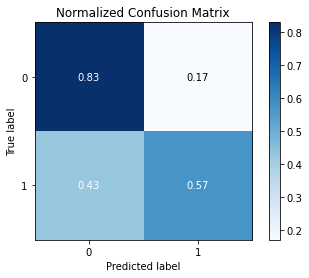

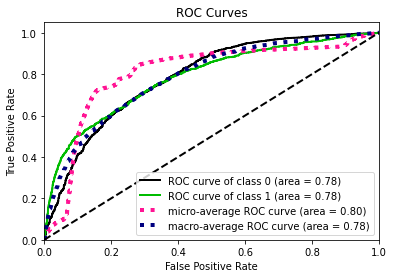

In [11]:
experimentar_normal(svc_norm,X,y,oversampling=True)

# PCA

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.49      0.57      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.766857,0.018537,0.701849,0.01204


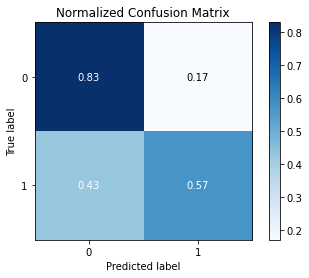

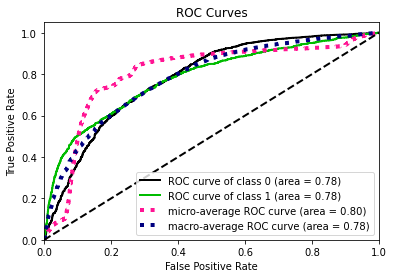

In [12]:
experimentar_pca(svc_pca,X,y,oversampling=True)

# Feature selection

In [13]:
features=[0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 19, 20]

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4673
           1       0.50      0.57      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.769759,0.019155,0.701504,0.0119


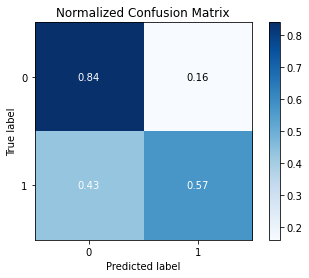

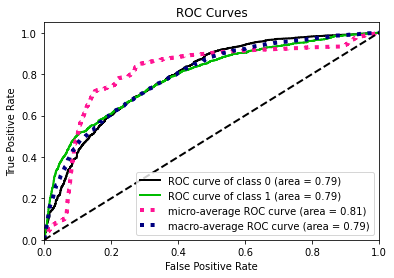

In [14]:
experimentar_feature_sel(svc_feature,X,y,features,oversampling=True)